In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [3]:
print(__doc__)

import time
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import signale
import numpy as np
import matplotlib.pyplot as pl
import spectrum as sp
import cPickle as pkl
import scipy.signal as scsig
import pywt
import colormaps as mycmps
import signale.tools as tools
import os
import itertools
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib.mlab import  PCA as mlabPCA
from mtspec import mtspec

/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/chenani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Automatically created module for IPython interactive environment


In [4]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
seabC = sns.xkcd_palette(colors)
colorsss = ['#FF0000', '#0000FF', '#008000', '#00FFFF', '#FF00FF', '#EE82EE',
        '#808000', '#800080', '#FF6347', '#FFFF00', '#9ACD32', '#4B0082',
        '#FFFACD', '#C0C0C0', '#A0522D', '#FA8072', '#FFEFD5', '#E6E6FA',
        '#F1FAC1', '#C5C5C5', '#A152ED', '#FADD72', '#F0EFD0', '#EEE6FF',
        '#01FAC1', '#F5F5F5', '#A152FF', '#FAFD72', '#F0EFDF', '#EEEFFF',
        '#F1FA99', '#C9C9C9', '#A152DD', '#FA5572', '#FFFFD0', '#EDD6FF']
def zScore(array):
    return(array - np.average(array))/ np.std(array)
clPalette = sns.color_palette('deep')
rippfgDF = pd.DataFrame([],columns=['animal','date','group','session','FG_prcnt','FG_sws','FG_rem','SWR_prcnt','SWR_sws','SWR_rem'])
#rippfgDF.to_pickle('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/RippPercentileDF.db')

In [5]:
animalPath = '/home/chenani/dataWork/ali/MECLesion_SleepData/Magda/Rat614Control/'
dataFolder = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat614Control/dataFiles/sleepDB/'
freqz = pkl.load(open('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/freqZ.nparr','rb'))
group = dataFolder.split('/')[-5]
animal = animalPath.split('/')[-2]
animal

'Rat614Control'

In [6]:
fgRipp_percentiles = pd.read_pickle('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/RippPercentileDF.db')
fgRipp_percentiles

,animal,date,group,session,FG_prcnt,FG_sws,FG_rem,SWR_prcnt,SWR_sws,SWR_rem
0,Rat3837,day1,lesion,PRE,52.943598,53.327496,52.566096,47.056402,46.672504,47.433904
1,Rat3837,day1,lesion,POST,52.932442,55.681818,47.751606,47.067558,44.318182,52.248394
2,Rat3837,day2,lesion,POST,76.463878,78.766643,73.763621,23.536122,21.233357,26.236379
3,Rat3837,day2,lesion,PRE,46.083597,50.034364,41.954023,53.916403,49.965636,58.045977
4,Rat3837,day3,lesion,PRE,75.686431,71.917192,78.673324,24.313569,28.082808,21.326676
5,Rat3837,day3,lesion,POST,72.560733,73.044218,72.113943,27.439267,26.955782,27.886057
6,Rat3837,day4,lesion,PRE,99.600436,99.666296,99.476440,0.399564,0.333704,0.523560
7,Rat3837,day4,lesion,POST,98.517110,97.888889,98.843262,1.482890,2.111111,1.156738
8,Rat3838,day1,lesion,PRE,70.535714,69.423929,77.570093,11.734694,13.441654,0.934579
9,Rat3838,day1,lesion,POST,76.555024,73.411154,85.401460,14.641148,15.953307,10.948905


In [26]:
#rippDB_orig = rippDB_orig.replace('CSC6-pre.lfp','day1')
#rippDB_orig.to_pickle(dataFolder+'Rat3661-rippDB.db')
#rippDB_orig[(rippDB_orig.date == '05-31-13')&(rippDB_orig.session=='03-sleep02')]

05-31-13
06-01-13
06-11-13


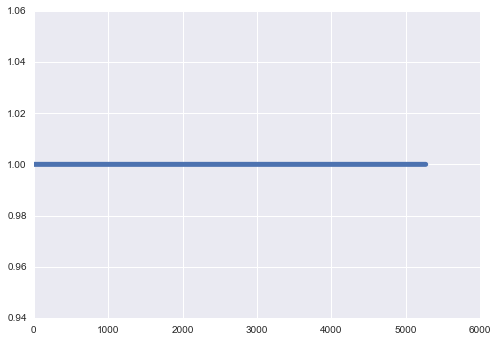

In [7]:
rippDB_orig = pd.read_pickle(dataFolder+'Rat614-rippDB.db')
rippPSD = pkl.load(open(dataFolder+'Rat614rippPSD-mtm.npArr','rb'))
whiteRippPSD = pkl.load(open(dataFolder+'Rat614whiteRippPSD-mtm.npArr','rb'))
rippSignal = pkl.load(open(dataFolder + 'Rat614rippSignal.npArr','rb'))
rippDB_orig.shape

zeros = np.where(rippPSD==0)
for ii,jj in zip(zeros[0],zeros[1]):
    rippPSD[ii,jj] = rippPSD[ii,jj-1]+rippPSD[ii,jj+1]/2
wzeros = np.where(whiteRippPSD==0)
for ii,jj in zip(wzeros[0],wzeros[1]):
    whiteRippPSD[ii,jj] = whiteRippPSD[ii,jj-1]+whiteRippPSD[ii,jj+1]/2
zeroMask = (rippPSD[:,0]>100)
rippDB = rippDB_orig[zeroMask]
rippDB = rippDB.reindex(np.arange(zeroMask.sum()))
rippPSD = rippPSD[zeroMask,:]
whiteRippPSD = whiteRippPSD[zeroMask,:]
pl.plot(zeroMask,lw=5)

for ii,item in enumerate(sorted(set(rippDB.date))):
    print item
    rippDB = rippDB.replace(item,'day'+str(ii+1))

##########Zscore
for jjj in range(rippPSD.shape[0]):
    rippPSD[jjj,:] = zScore(np.log10(rippPSD[jjj,:]))
    whiteRippPSD[jjj,:] = zScore(np.log10(whiteRippPSD[jjj,:]))
##########PCA
pca = mlabPCA(rippPSD)
wpca = mlabPCA(whiteRippPSD)
usefulComps = pca.Y[:,range(5)]
wusefulComps = wpca.Y[:,range(5)]

rippDB['PC1'] = usefulComps[:,0]
rippDB['PC2'] = usefulComps[:,1]
rippDB['PC3'] = usefulComps[:,2]
rippDB['PC4'] = usefulComps[:,3]
rippDB['PC5'] = usefulComps[:,4]
rippDB['wPC1'] = wusefulComps[:,0]
rippDB['wPC2'] = wusefulComps[:,1]
rippDB['wPC3'] = wusefulComps[:,2]
rippDB['wPC4'] = wusefulComps[:,3]
rippDB['wPC5'] = wusefulComps[:,4]
rippDB['wc'] = np.zeros(rippDB.shape[0])


In [28]:
#zeroMask.size,rippDB_orig.shape,rippPSD.shape,rippDB.shape,rippDB.index


In [19]:
dday = 'day3'
df= rippDB[rippDB.date==dday]
validIdx = df.index
wPSD = whiteRippPSD[validIdx,:]

## Creating Feature files and Clustering

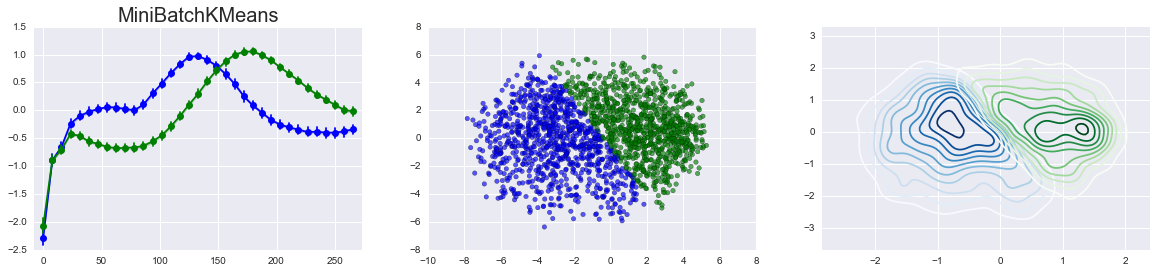

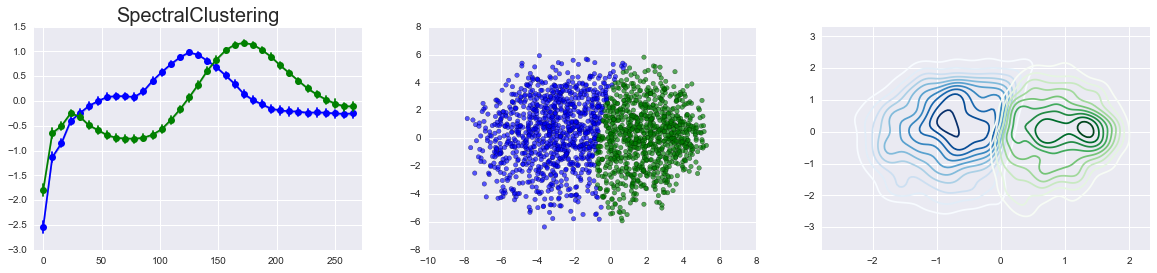

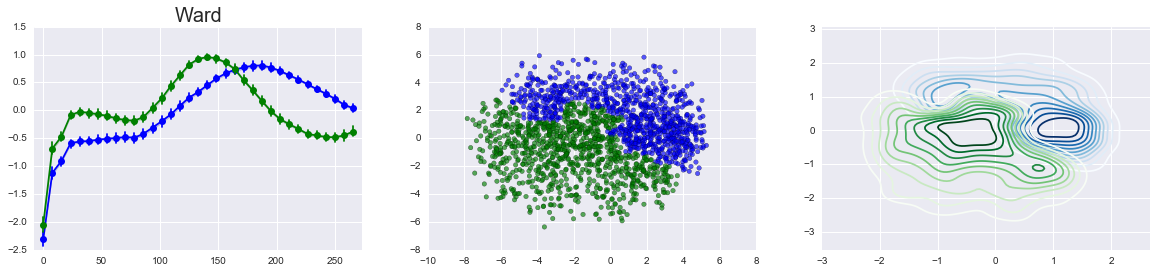

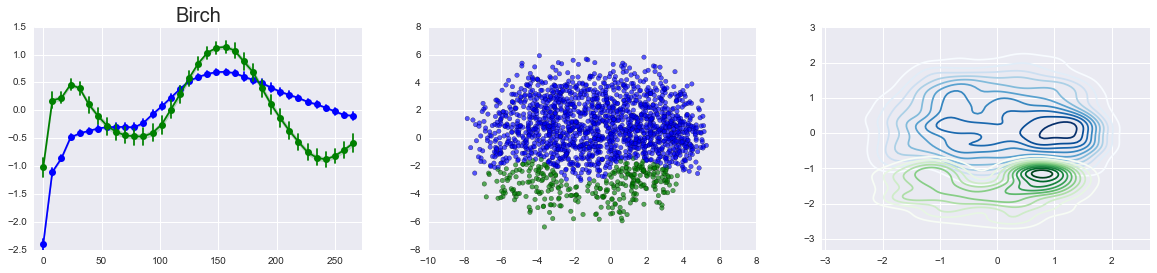

In [20]:
np.random.seed(123456)
no_structure = df[['wPC1','wPC2']].as_matrix(), None
nClust = 2
colors = np.array([x for x in 'bgrkcmybgrkcmybgrkcmybgrkcmy'])
colors = np.hstack([colors] * 20)
CLRMPS = ["Blues","Greens","Reds","Greys"]
clustering_names = ['MiniBatchKMeans', 'SpectralClustering', 'Ward', 'Birch']
pl.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
datasets = [ no_structure]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=5, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    two_means = cluster.MiniBatchKMeans(n_clusters=nClust)
    ward = cluster.AgglomerativeClustering(n_clusters=nClust, linkage='ward',connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=nClust,eigen_solver='arpack',affinity="rbf")
    birch = cluster.Birch(threshold=0.5,n_clusters=nClust)
    clustering_algorithms = [two_means,spectral, ward, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        #Ocond  = (y_pred==0)
        #Tcond  = (y_pred==1)
        #TRcond = (y_pred==2)
        #Fcond  = (y_pred==3)
        f,(ax,bx,cx) = pl.subplots(1,3,figsize=[20,4])
        conds = [y_pred==ii for ii in set(y_pred)]
        for ii,cnd in enumerate(conds):
            sns.tsplot(wPSD[cnd,:],time = freqz[:35],color=colors[ii],ax=ax)
            sns.tsplot(wPSD[cnd,:],time = freqz[:35],color=colors[ii],ci=99.9,err_style="ci_bars", interpolate=False,ax=ax)
            bx.scatter(df.wPC1,df.wPC2,c=colors[y_pred],alpha=0.4)
        if nClust<5:
            for ii in range(nClust):
                sns.kdeplot(X[y_pred==ii,0],X[y_pred==ii,1],cmap=CLRMPS[ii],ax=cx)
        ax.set_title(name,fontsize=20)
        #sns.tsplot(wPSD[Tcond,:],time = freqz[:35],color=colors[1],ax=ax)
        #sns.tsplot(wPSD[Tcond,:],time = freqz[:35],color=colors[1],ci=99.9,err_style="ci_bars", interpolate=False,ax=ax)
        #sns.tsplot(wPSD[TRcond,:],time = freqz[:35],color=colors[2],ax=ax)
        #sns.tsplot(wPSD[TRcond,:],time = freqz[:35],color=colors[2],ci=99.9,err_style="ci_bars", interpolate=False,ax=ax)
        #sns.tsplot(wPSD[Fcond,:],time = freqz[:35],color=colors[3],ax=ax)
        #sns.tsplot(wPSD[Fcond,:],time = freqz[:35],color=colors[3],ci=99.9,err_style="ci_bars", interpolate=False,ax=ax)
        

In [21]:
mtd = spectral
if hasattr(mtd, 'labels_'):
    wc = mtd.labels_.astype(np.int)
else:
    wc = mtd.predict(X)

#np.place(wc,wc==2,[300])
#np.place(wc,wc==3,[300])
np.place(wc,wc==0,[100])
np.place(wc,wc==1,[300])
#np.place(wc,wc==3,[300])

df['wc'] = wc
rippDB.wc[validIdx]=0
rippDB.wc[validIdx]+=wc


/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
rippDB = rippDB.replace('01-sleep01','PRE')
rippDB = rippDB.replace('03-sleep02','POST')
rippDB = rippDB.replace('Rat614Control','Rat614')
rippDB[rippDB.date=='day1']
rippDB.to_pickle(dataFolder+'Rat614-RipplesTimeDB-SKLRN.pd')

In [33]:
''''wc -=wc
wc[np.logical_and(df.wPC1>1,df.wPC2<222)] = 300
wc[np.logical_and(df.wPC1<0,df.wPC2<120)] = 100
df['wc'] = wc
rippDB.wc[validIdx]=wc

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-33-5e1a5f1baa1d>, line 5)

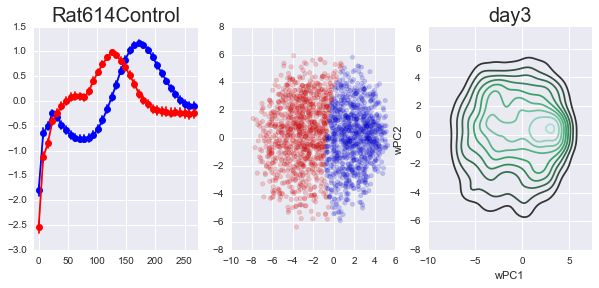

In [59]:
#dday = 'day3'
SWRcond = (df.wc ==300)
SGcond = (df.wc ==200)
FGcond = (df.wc ==100)
f,(ax,bx,cx) = pl.subplots(1,3,figsize=[10,4])
sns.tsplot(wPSD[SWRcond.as_matrix(),:],time = freqz[:35],color='b',ax=ax)
sns.tsplot(wPSD[SWRcond.as_matrix(),:],time = freqz[:35],color='b',ci=99.9,err_style="ci_bars", interpolate=False,ax=ax)
sns.tsplot(wPSD[FGcond.as_matrix(),:],time = freqz[:35],color='r',ax=ax)
sns.tsplot(wPSD[FGcond.as_matrix(),:],time = freqz[:35],color='r',ci=99.9,err_style="ci_bars", interpolate=False,ax=ax)
#sns.tsplot(whiteRippPSD[SGcond.as_matrix(),:],time = freqz[:35],color=seabC[2],ax=ax)
#sns.tsplot(whiteRippPSD[SGcond.as_matrix(),:],time = freqz[:35],color=seabC[2],ci=99.9,err_style="ci_bars", interpolate=False,ax=ax)
bx.scatter(df.wPC1,df.wPC2,c=df.wc,alpha=0.2,cmap='bwr_r')
sns.kdeplot(df.wPC1,df.wPC2,ax=cx)
ax.set_title(animal,fontsize=20)
cx.set_title(dday,fontsize=20)
#f.savefig(dataFolder + animal+'-'+dday+'-'+'FG-SWR-clusters.pdf')

In [55]:
1e2*FGcond.sum()/FGcond.size,1e2*SGcond.sum()/SGcond.size,1e2*SWRcond.sum()/SWRcond.size

(46.993524514338574, 0.0, 53.006475485661426)

In [60]:
for sess in set(df.session):
    FGprcnt  = 1e2*df[(df.wc==100) & (df.session==sess)].index.size/df[df.session==sess].index.size
    FGprcntS  = 1e2*df[((df.wc==100) & (df.session==sess))&(df.epoch=='sws')].index.size/df[(df.session==sess)&(df.epoch=='sws')].index.size
    try:
        FGprcntR  = 1e2*df[((df.wc==100) & (df.session==sess))&(df.epoch=='rem')].index.size/df[(df.session==sess)&(df.epoch=='rem')].index.size
    except ZeroDivisionError:
        FGprcntR = np.nan
    SWRprcnt = 1e2*df[(df.wc==300) & (df.session==sess)].index.size/df[df.session==sess].index.size
    SWRprcntS = 1e2*df[((df.wc==300) & (df.session==sess))&(df.epoch=='sws')].index.size/df[(df.session==sess)&(df.epoch=='sws')].index.size
    try:
        SWRprcntR = 1e2*df[((df.wc==300) & (df.session==sess))&(df.epoch=='rem')].index.size/df[(df.session==sess)&(df.epoch=='rem')].index.size
    except ZeroDivisionError:
        SWRprcntR = np.nan
    print '%s ---> fGamma:%0.2f, sws: %0.02f, rem: %0.2f||||| SWR: %0.2f,sws: %0.2f,rem: %0.2f' %(sess,FGprcnt,FGprcntS,FGprcntR,SWRprcnt,SWRprcntS,SWRprcntR)
    rippfgDF = rippfgDF.append(pd.DataFrame([[animal,np.unique(df.date)[0],group,sess.split('-')[-1],FGprcnt,FGprcntS,FGprcntR,SWRprcnt,SWRprcntS,SWRprcntR]],
                           columns=['animal','date','group','session','FG_prcnt','FG_sws','FG_rem','SWR_prcnt','SWR_sws','SWR_rem'])
                           ,ignore_index=True)

01-sleep01 ---> fGamma:56.86, sws: 28.00, rem: 59.41||||| SWR: 43.14,sws: 72.00,rem: 40.59
03-sleep02 ---> fGamma:42.18, sws: 44.71, rem: 31.18||||| SWR: 57.82,sws: 55.29,rem: 68.82


In [37]:
#rippfgDF = rippfgDF.replace('day4','day3')
#rippfgDF = rippfgDF[(rippfgDF.index != 4)&(rippfgDF.index != 5)]
rippfgDF

,animal,date,group,session,FG_prcnt,FG_sws,FG_rem,SWR_prcnt,SWR_sws,SWR_rem
0,Rat614Control,day1,control,sleep01,60.659898,66.165414,57.142857,39.340102,33.834586,42.857143
1,Rat614Control,day1,control,sleep02,40.048251,48.983364,22.950820,59.951749,51.016636,77.049180


In [46]:
#fgRipp_percentiles = fgRipp_percentiles.append(rippfgDF,ignore_index=True)
#fgRipp_percentiles = fgRipp_percentiles.replace('sleep02','POST')
fgRipp_percentiles.to_pickle('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/RippPercentileDF.db')

In [47]:
fgRipp_percentiles[fgRipp_percentiles.group=='control']

,animal,date,group,session,FG_prcnt,FG_sws,FG_rem,SWR_prcnt,SWR_sws,SWR_rem
32,Rat616Control,day1,control,PRE,73.714286,73.858921,73.638344,26.285714,26.141079,26.361656
33,Rat616Control,day1,control,POST,58.404908,57.807309,60.093897,41.595092,42.192691,39.906103
34,Rat3839,day1,control,PRE,39.179954,39.962825,38.639281,60.820046,60.037175,61.360719
35,Rat3839,day1,control,POST,35.967504,36.689038,35.214447,64.032496,63.310962,64.785553
36,Rat3839,day2,control,PRE,51.387347,52.316891,48.706897,48.612653,47.683109,51.293103
37,Rat3839,day2,control,POST,50.815851,50.301205,52.659574,49.184149,49.698795,47.340426
38,Rat3839,day3,control,PRE,54.984424,62.795858,36.649215,45.015576,37.204142,63.350785
39,Rat3839,day3,control,POST,52.361564,47.787611,52.782765,47.638436,52.212389,47.217235
40,Rat3839,day4,control,PRE,58.429031,61.669829,55.387355,41.570969,38.330171,44.612645
41,Rat3839,day4,control,POST,51.375632,56.403622,47.148676,48.624368,43.596378,52.851324


In [65]:
np.unique(rippDB.wc)
#rippDB[rippDB.date=='day1']
#rippDB.to_pickle(dataFolder+animal+'-RipplesTimeDB-SKLRN.pd')

In [42]:
#fgRipp_percentiles = fgRipp_percentiles.replace('sleep02','POST')

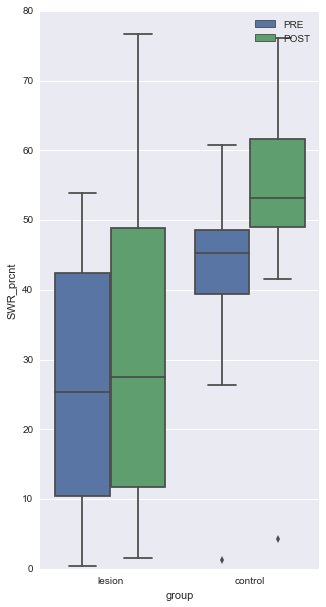

In [48]:
f,ax=pl.subplots(1,1,figsize=[5,10])
sns.boxplot(x='group',y='SWR_prcnt',data=fgRipp_percentiles,hue='session')
pl.legend()

(-1, 101)

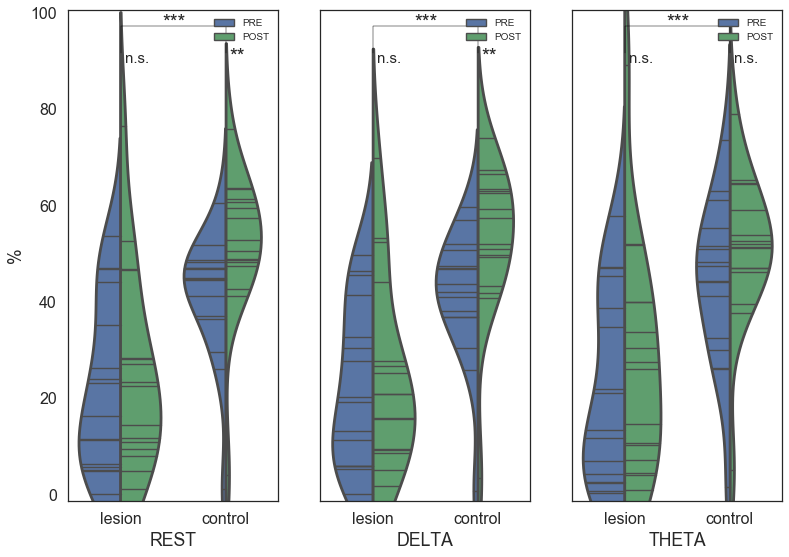

In [49]:
dfCont = fgRipp_percentiles[fgRipp_percentiles.group=='control']
dfLes  = fgRipp_percentiles[fgRipp_percentiles.group=='lesion'] 
print 'SWR           Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].SWR_prcnt,fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].SWR_prcnt)[1]
print 'SWR in DELTA, Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].SWR_sws,fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].SWR_sws)[1]
print 'SWR in THETA, Control vs. Lesion p=%f'%ranksums(fgRipp_percentiles[fgRipp_percentiles.group=='control'].SWR_rem,fgRipp_percentiles[fgRipp_percentiles.group=='lesion'].SWR_rem)[1]
print '--------------------------'
print 'SWR in Control        PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].SWR_prcnt,dfCont[dfCont.session=='POST'].SWR_prcnt)[1]
print 'SWR in DELTA-Control, PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].SWR_sws,dfCont[dfCont.session=='POST'].SWR_sws)[1]
print 'SWR in THETA-Control, PRE vs. POST p=%f'%ranksums(dfCont[dfCont.session=='PRE'].SWR_rem,dfCont[dfCont.session=='POST'].SWR_rem)[1]
print '--------------------------'
print 'SWR in Lesion        PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].SWR_prcnt,dfLes[dfLes.session=='POST'].SWR_prcnt)[1]
print 'SWR in DELTA-Lesion, PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].SWR_sws,  dfLes[dfLes.session=='POST'].SWR_sws)[1]
print 'SWR in THETA-Lesion, PRE vs. POST p=%f'%ranksums(dfLes[dfLes.session=='PRE'].SWR_rem,  dfLes[dfLes.session=='POST'].SWR_rem)[1]

NameError: name 'ranksums' is not defined

(-1, 101)

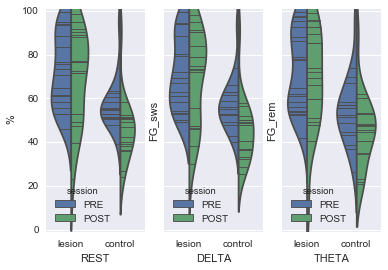

In [50]:
f,(ax,bx,cx) = pl.subplots(1,3,sharey=True)
sns.violinplot(x='group',y='FG_prcnt',data=fgRipp_percentiles,inner='stick',split=True,hue='session',ax=ax)
sns.violinplot(x='group',y='FG_sws',data=fgRipp_percentiles,inner='stick',split=True,hue='session',ax=bx)
sns.violinplot(x='group',y='FG_rem',data=fgRipp_percentiles,inner='stick',split=True,hue='session',ax=cx)
#sns.swarmplot(x='group',y='SWR_prcnt',hue='session',size = 2,data=fgRipp_percentiles,ax=ax)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[1:2],['Significant'])
ax.set_xlabel('REST')
bx.set_xlabel('DELTA')
cx.set_xlabel('THETA')
ax.set_ylabel(' %')
ax.set_ylim(-1,101)

In [139]:
from scipy.stats import wilcoxon,ranksums